In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re

### Data

In [12]:
charting_df = pd.read_csv('data/charting-m-points.csv', encoding = "ISO-8859-1")

/var/folders/0w/7qj8hh4n3w53g1qsr8gf4s_w0000gn/T/ipykernel_1829/2249881497.py:1: DtypeWarning: Columns (8,9,29) have mixed types. Specify dtype option on import or set low_memory=False.
  charting_df = pd.read_csv('data/charting-m-points.csv', encoding = "ISO-8859-1")


In [13]:
charting_df.head(1)

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20220713-M-Newport-R16-Andy_Murray-Max_Purcell,1,0,0,0.0,0.0,0-0,1 (1),1,0,...,NaN,False,False,False,False,False,False,1,1,1


### Exploration

In [14]:
wimbeldon_chart_df = charting_df[charting_df['match_id'].str.contains('Wimbledon')]

#### Winning Shot Statistics

In [15]:
# get rows for both 1st and 2nd
wimbeldon_chart_1st = wimbeldon_chart_df[wimbeldon_chart_df['1st'].notna()]
wimbeldon_chart_2nd = wimbeldon_chart_df[wimbeldon_chart_df['2nd'].notna()]

In [16]:
rallys = wimbeldon_chart_1st['1st']
rallys = rallys.append(wimbeldon_chart_2nd['2nd'])

/var/folders/0w/7qj8hh4n3w53g1qsr8gf4s_w0000gn/T/ipykernel_1829/3234859012.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rallys = rallys.append(wimbeldon_chart_2nd['2nd'])


In [17]:
rallys.shape

(78705,)

In [18]:
# sequences of rallies that end with '*' represent a winner was hit
# winners_df_1st = wimbeldon_chart_1st[wimbeldon_chart_1st['1st'].str.contains("\*")]
# winners_df_2nd = wimbeldon_chart_2nd[wimbeldon_chart_2nd['2nd'].str.contains("\*")]
winning_shots = rallys[rallys.str.contains("\*")]

In [19]:
#winners_df = winners_df_1st['1st']
#winners_df = winners_df.append(winners_df_2nd['2nd'])

In [20]:
winning_shots.shape

(20290,)

In [21]:
# 1st value: winners
# 2nd value: total occurences of this shot selection in general
shot_map = {
    'f': [0, 0,'fh gs'],
    'b': [0, 0,'bh gs'],
    'r': [0, 0, 'fh slice'],
    's': [0, 0, 'bh slice'],
    'v': [0, 0,'fh volley'],
    'z': [0, 0,'bh volley'],
    'o': [0, 0,'oh smash'],
    'p': [0, 0,'bh smash'],
    'u': [0, 0,'fh drop'],
    'y': [0, 0,'bh drop'],
    'l': [0, 0,'fh lob'],
    'm': [0, 0,'bh lob'],
    'h': [0, 0,'fh hv'],
    'i': [0, 0,'bh hv'],
    'j': [0, 0,'fh sv'],
    'k': [0, 0,'bh sv'],
    't': [0, 0,'trickshot'],
    'q': [0, 0,'unknown'],
    'c': [0, 0,'challenge']
}

#### get winning shots

In [22]:
letter_regex = '[a-zA-Z]'

In [23]:
num_of_winning_shots = 0
for i in winning_shots:
    if len(i) > 2: # ignore aces for now
        winning_shot = i[-4:]
        match = re.search(r'{letter_regex}'.format(letter_regex=letter_regex), winning_shot)
        if match:
            shot = match[0]
            if shot == 'd':
                winning_shot = i[-5:]
                match = re.search(r'{letter_regex}'.format(letter_regex=letter_regex), winning_shot)  
                shot = match[0]
            num_of_winning_shots += 1
            shot_map[shot.lower()][0] += 1
            

In [24]:
shot_map

{'f': [4865, 0, 'fh gs'],
 'b': [2681, 0, 'bh gs'],
 'r': [91, 0, 'fh slice'],
 's': [311, 0, 'bh slice'],
 'v': [2122, 0, 'fh volley'],
 'z': [1896, 0, 'bh volley'],
 'o': [1221, 0, 'oh smash'],
 'p': [61, 0, 'bh smash'],
 'u': [165, 0, 'fh drop'],
 'y': [138, 0, 'bh drop'],
 'l': [93, 0, 'fh lob'],
 'm': [111, 0, 'bh lob'],
 'h': [81, 0, 'fh hv'],
 'i': [65, 0, 'bh hv'],
 'j': [139, 0, 'fh sv'],
 'k': [29, 0, 'bh sv'],
 't': [2, 0, 'trickshot'],
 'q': [10, 0, 'unknown'],
 'c': [244, 0, 'challenge']}

#### get total occurences of shot in general and build df for viz

In [25]:
all_rallys_str = ''.join(list(rallys))

In [26]:
df = []
for shot, stats in shot_map.items():
    total_shots = all_rallys_str.count(shot)
    stats[1] = total_shots
    df.append({
        'shot': stats[2],
        'total': stats[1],
        'winners': stats[0]
    })

In [27]:
shot_map

{'f': [4865, 63776, 'fh gs'],
 'b': [2681, 49124, 'bh gs'],
 'r': [91, 4477, 'fh slice'],
 's': [311, 22149, 'bh slice'],
 'v': [2122, 6178, 'fh volley'],
 'z': [1896, 7183, 'bh volley'],
 'o': [1221, 1978, 'oh smash'],
 'p': [61, 212, 'bh smash'],
 'u': [165, 667, 'fh drop'],
 'y': [138, 889, 'bh drop'],
 'l': [93, 1124, 'fh lob'],
 'm': [111, 2260, 'bh lob'],
 'h': [81, 1116, 'fh hv'],
 'i': [65, 1236, 'bh hv'],
 'j': [139, 302, 'fh sv'],
 'k': [29, 71, 'bh sv'],
 't': [2, 99, 'trickshot'],
 'q': [10, 134, 'unknown'],
 'c': [244, 2916, 'challenge']}

In [28]:
shot_selection_df = pd.DataFrame(df)

In [29]:
shot_selection_df =  shot_selection_df.sort_values("total", ascending=False)

In [30]:
shot_selection_df = shot_selection_df[shot_selection_df['total']>=6000]

### Plots

#### regular

/var/folders/0w/7qj8hh4n3w53g1qsr8gf4s_w0000gn/T/ipykernel_1829/2384458608.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels, size=22)


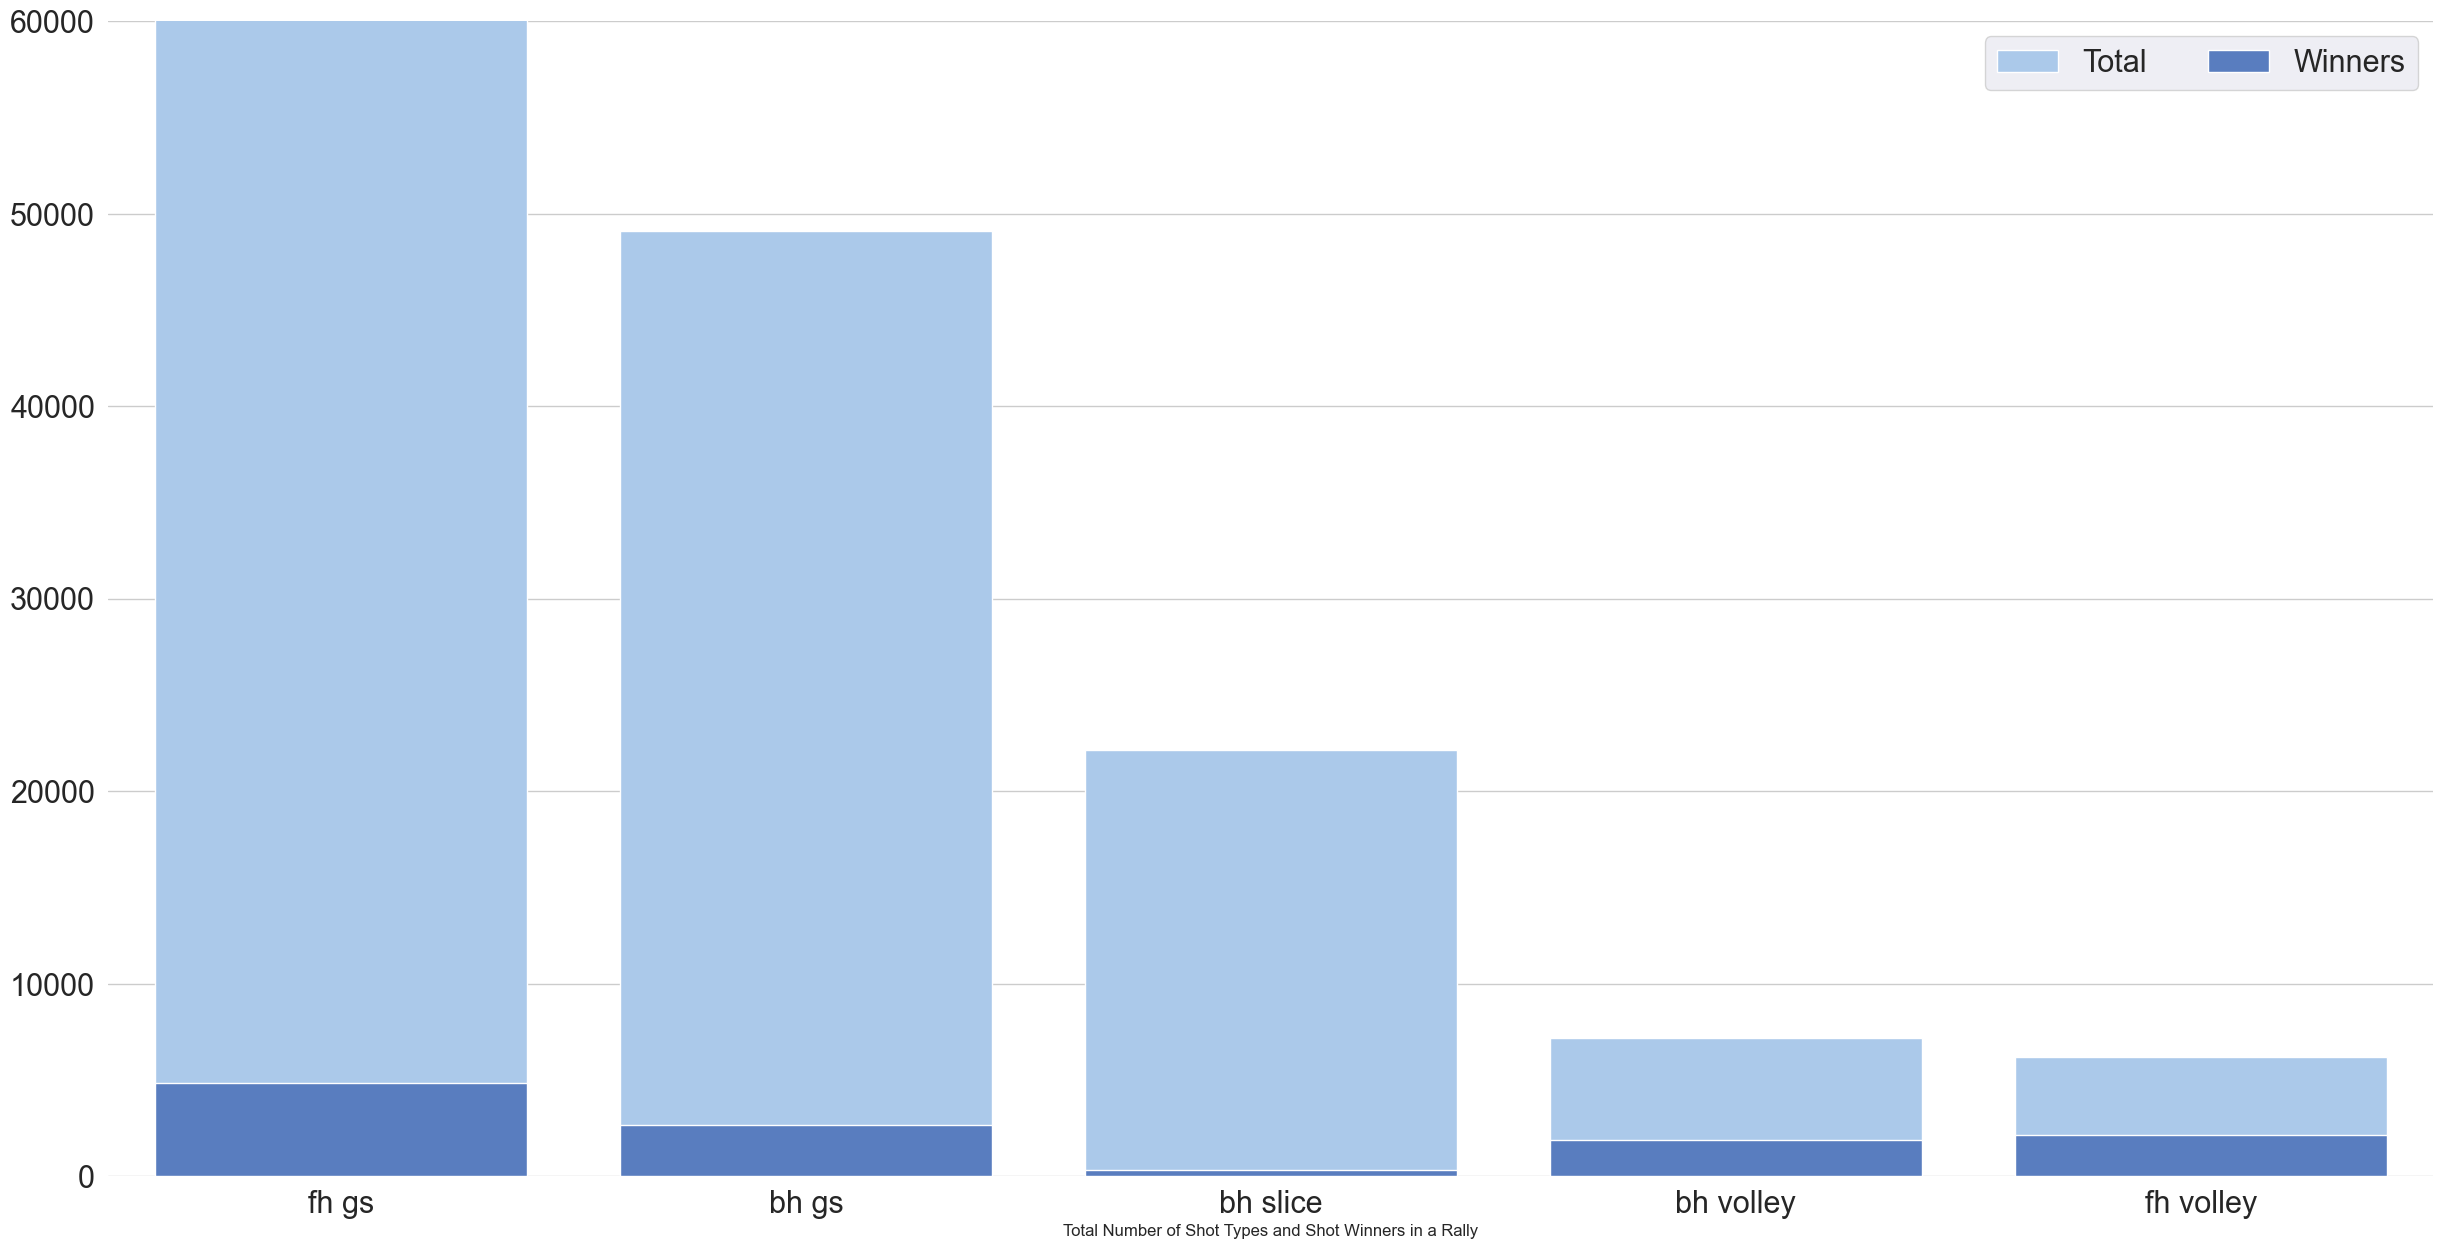

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

sns.set(font_scale=2)
sns.set_color_codes("pastel")
sns.barplot(x="shot", y="total", data=shot_selection_df,
            label="Total", color="b")


sns.set_color_codes("muted")
sns.barplot(x="shot", y="winners", data=shot_selection_df,
            label="Winners", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(0, 60000), ylabel="",
       xlabel="Total Number of Shot Types and Shot Winners in a Rally")

# get label text
_, xlabels = plt.xticks()

# set the x-labels with
ax.set_xticklabels(xlabels, size=22)

# get label text
_, ylabels = plt.yticks()

# set the y-labels with
ax.set_yticklabels(ylabels, size=22)

sns.despine(left=True, bottom=True)

In [32]:
f.savefig("shot_fig.png")

#### flipped

/var/folders/0w/7qj8hh4n3w53g1qsr8gf4s_w0000gn/T/ipykernel_1829/597388156.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, size=30)


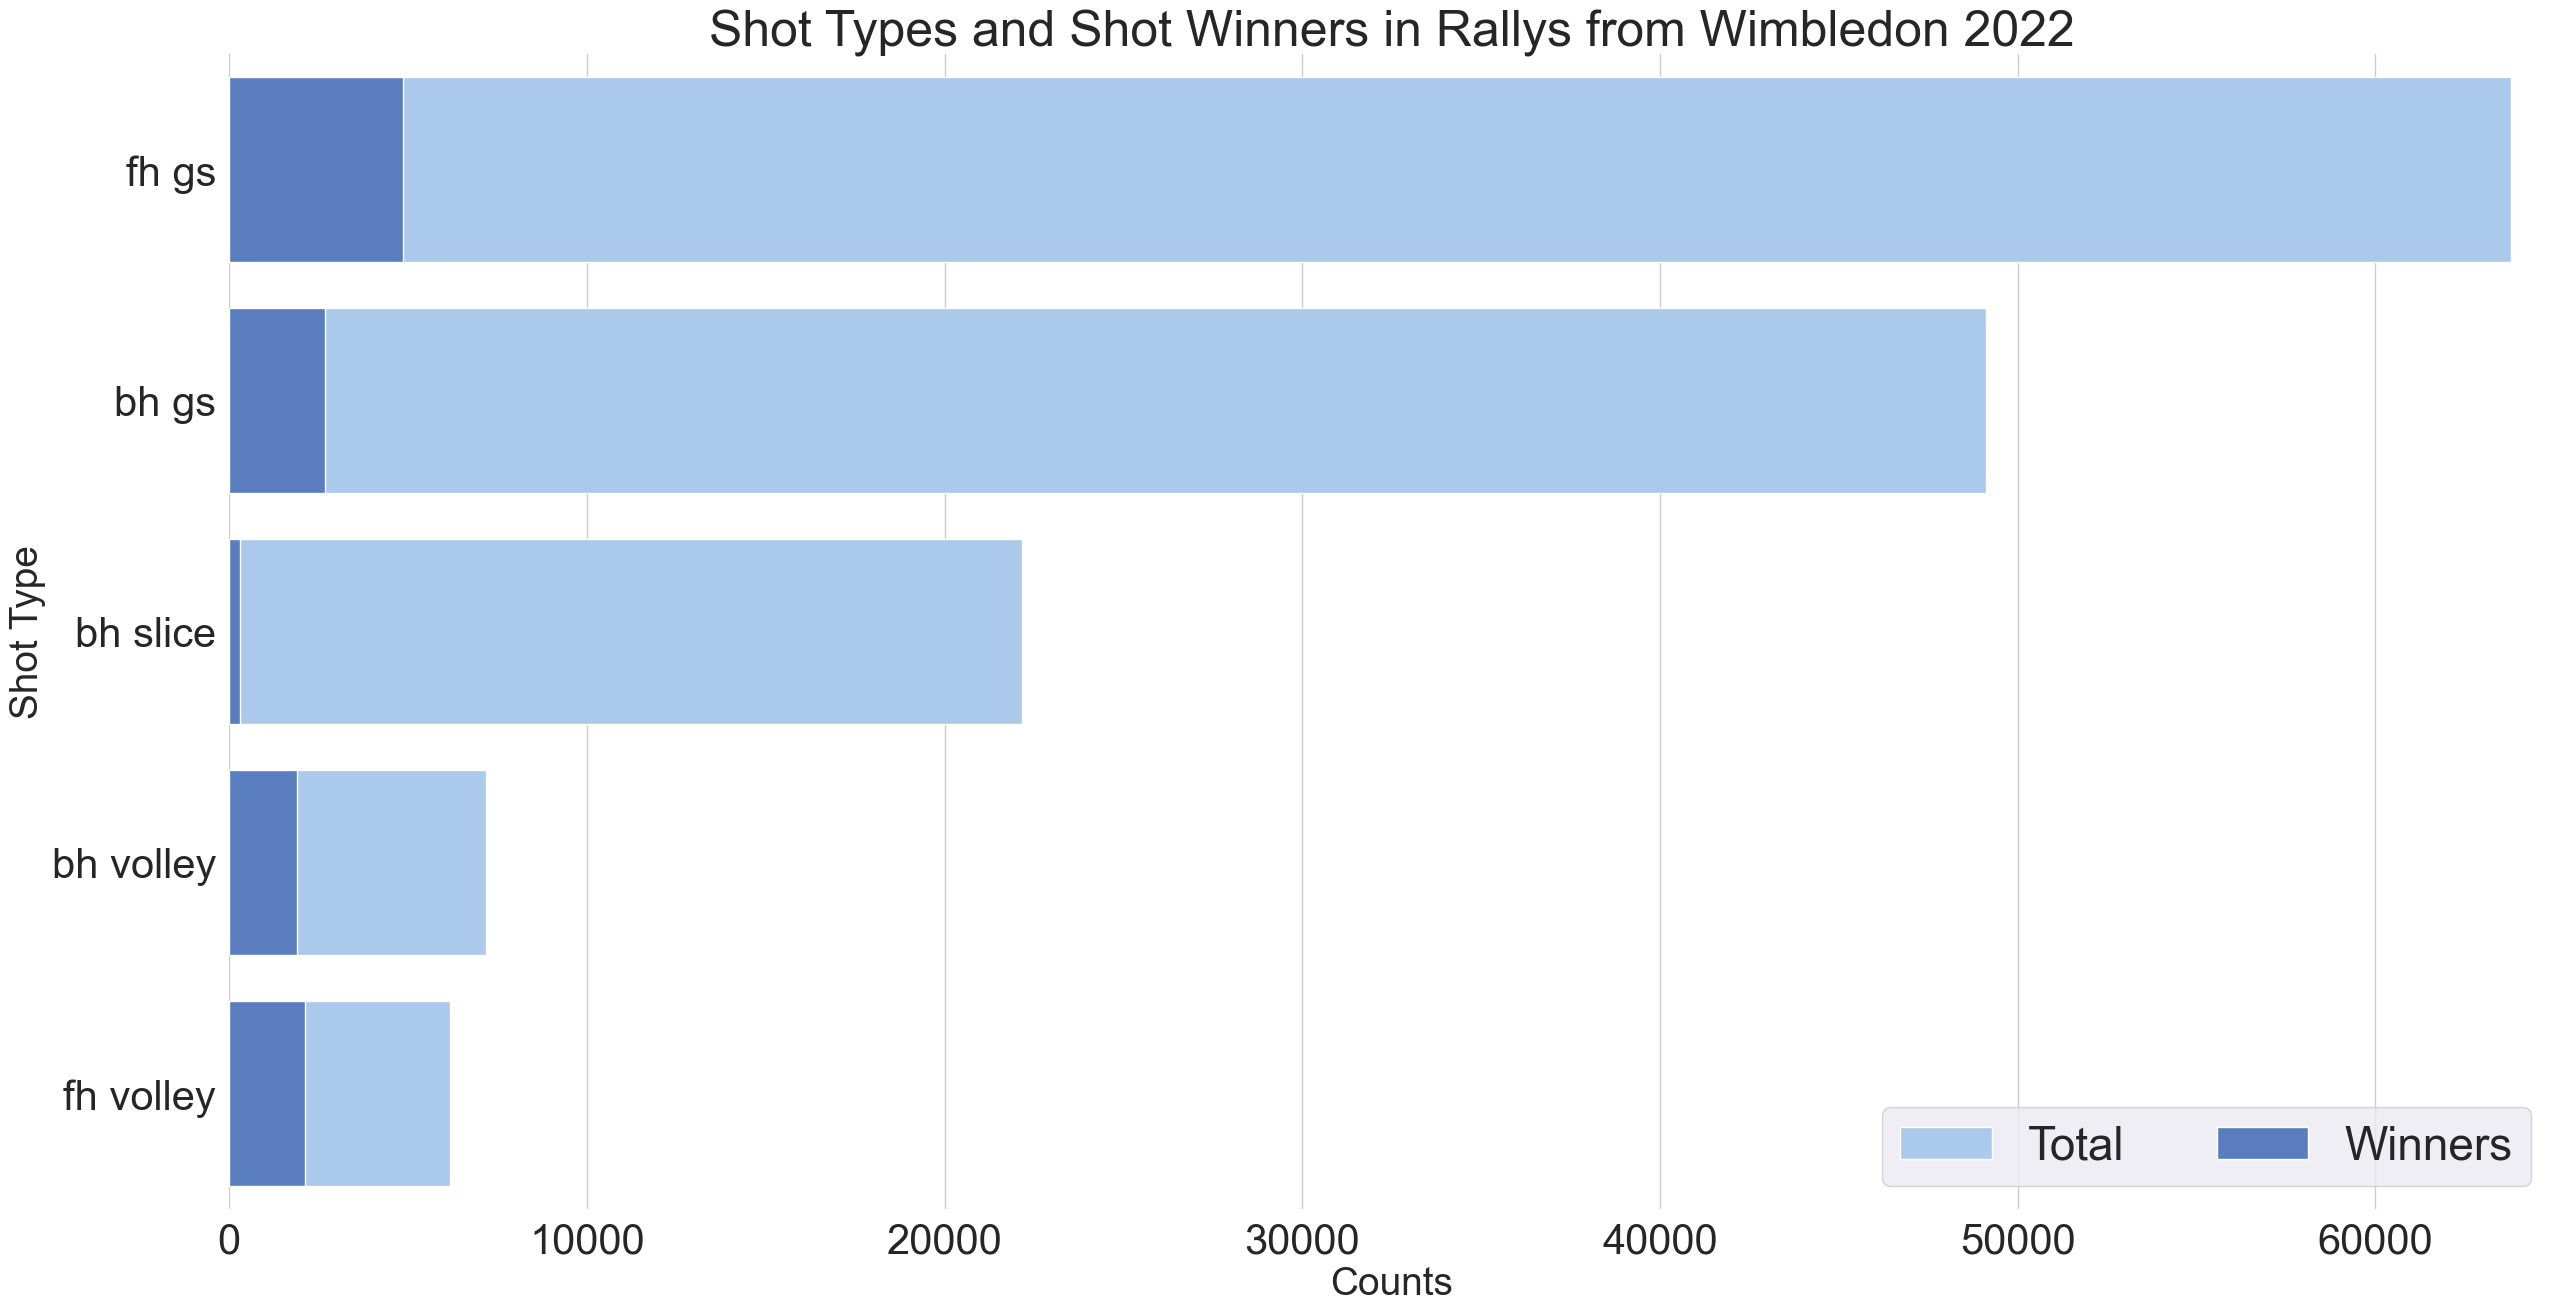

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.rcParams["axes.labelsize"] = 28
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

sns.set(font_scale=3)
sns.set_color_codes("pastel")
sns.barplot(x="total", y="shot", data=shot_selection_df,
            label="Total", color="b").set_title('Shot Types and Shot Winners in Rallys from Wimbledon 2022')


sns.set_color_codes("muted")
sns.barplot(x="winners", y="shot", data=shot_selection_df,
            label="Winners", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 65000), ylabel="Shot Type",
       xlabel="Counts")

# get label text
_, xlabels = plt.xticks()

# set the x-labels with
ax.set_xticklabels(xlabels, size=30)

# get label text
_, ylabels = plt.yticks()

# set the y-labels with
ax.set_yticklabels(ylabels, size=30)

sns.despine(left=True, bottom=True)

In [34]:
f.savefig("shot_fig_flipped.png")

### Percentages

In [35]:
shot_selection_df['winner_percentage'] = shot_selection_df['winners']/shot_selection_df['total']

In [36]:
shot_selection_df.sort_values("winners", ascending=False)

,shot,total,winners,winner_percentage
0,fh gs,63776,4865,0.076283
1,bh gs,49124,2681,0.054576
4,fh volley,6178,2122,0.343477
5,bh volley,7183,1896,0.263957
3,bh slice,22149,311,0.014041


In [37]:
shot_selection_df.sort_values("total", ascending=False)

,shot,total,winners,winner_percentage
0,fh gs,63776,4865,0.076283
1,bh gs,49124,2681,0.054576
3,bh slice,22149,311,0.014041
5,bh volley,7183,1896,0.263957
4,fh volley,6178,2122,0.343477


In [38]:
shot_selection_df.sort_values("winner_percentage", ascending=False)

,shot,total,winners,winner_percentage
4,fh volley,6178,2122,0.343477
5,bh volley,7183,1896,0.263957
0,fh gs,63776,4865,0.076283
1,bh gs,49124,2681,0.054576
3,bh slice,22149,311,0.014041


## Last 2 shots

In [39]:
shot_map

{'f': [4865, 63776, 'fh gs'],
 'b': [2681, 49124, 'bh gs'],
 'r': [91, 4477, 'fh slice'],
 's': [311, 22149, 'bh slice'],
 'v': [2122, 6178, 'fh volley'],
 'z': [1896, 7183, 'bh volley'],
 'o': [1221, 1978, 'oh smash'],
 'p': [61, 212, 'bh smash'],
 'u': [165, 667, 'fh drop'],
 'y': [138, 889, 'bh drop'],
 'l': [93, 1124, 'fh lob'],
 'm': [111, 2260, 'bh lob'],
 'h': [81, 1116, 'fh hv'],
 'i': [65, 1236, 'bh hv'],
 'j': [139, 302, 'fh sv'],
 'k': [29, 71, 'bh sv'],
 't': [2, 99, 'trickshot'],
 'q': [10, 134, 'unknown'],
 'c': [244, 2916, 'challenge']}

In [40]:
shot_regex = '[fbrsvzopuylmhijktqc]'
shot_and_direction = '[fbrsvzopuylmhijktqc][123]'

In [41]:
match = re.findall(shot_regex, '6+s28z2m1o3*', flags=0)

In [54]:
match

['s', 'z', 'm', 'o']

In [42]:
match[-2]

'm'

In [43]:
winning_sequence = []
for rally in winning_shots:
    shots = re.findall(shot_and_direction, rally, flags=0)
    if len(shots) > 2:
        winning_sequence.append({
            'rally': rally,
            'receiving_shot': shots[-2],
            'winning_shot': shots[-1], 
            'combined': shots[-2] + shots[-1]
        })

In [44]:
winning_sequence_df = pd.DataFrame(winning_sequence)

In [45]:
# rallys of length greater than two
winning_sequence_df

,rally,receiving_shot,winning_shot,combined
0,6f2f2b2b3*,b2,b3,b2b3
1,4b2f3s2f+2b2v1f1*,v1,f1,v1f1
2,6s2f+3s2o1*,s2,o1,s2o1
3,5f2f3s3f3s2f1f2f2b2b3s1f2f1f1f3*,f1,f3,f1f3
4,5b2f3b2f1f3b2f3*,b2,f3,b2f3
...,...,...,...,...
7480,4+s17z1m2o1*,m2,o1,m2o1
7481,4+s17z3f3*,z3,f3,z3f3
7482,5+f17z1b3v3*,b3,v3,b3v3
7483,6+s28z2m1o3*,m1,o3,m1o3


In [46]:
winning_sequence_counts = pd.DataFrame(winning_sequence_df['combined'].value_counts())

In [47]:
winning_sequence_counts_top_ten = winning_sequence_counts.head(10)

In [48]:
winning_sequence_counts_top_ten['percentage of total winners'] = winning_sequence_counts_top_ten['combined'] / winning_sequence_df.shape[0] 

/var/folders/0w/7qj8hh4n3w53g1qsr8gf4s_w0000gn/T/ipykernel_1829/1416413489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_sequence_counts_top_ten['percentage of total winners'] = winning_sequence_counts_top_ten['combined'] / winning_sequence_df.shape[0]


In [49]:
winning_sequence_counts_top_ten

,combined,percentage of total winners
f1f3,197,0.026319
m2o1,197,0.026319
m2o3,162,0.021643
b1v1,152,0.020307
f1f1,135,0.018036
b2v1,117,0.015631
b3z1,110,0.014696
b2f1,108,0.014429
f3b1,107,0.014295
f3z3,104,0.013894


## P(shot is winner | receiving shot)

Getting all probabilities for each shot pair with direction

### Charting Definitions

```
{
    'f': 'fh gs,
     'b': 'bh gs',
     'r': 'fh slice',
     's': 'bh slice',
     'v': 'fh volley',
     'z': 'bh volley',
     'o': 'over hand smash',
     'p': 'bh smash',
     'u': 'fh drop',
     'y': 'bh drop',
     'l': 'fh lob',
     'm': 'bh lob',
     'h': 'fh half volley',
     'i': 'bh half volley',
     'j': 'fh swinging volley',
     'k': 'bh swinging volley',
     't': 'trickshot',
     'q': 'unknown',
     'c': 'challenge'
}
 ```
 
``` 
{ 
    '1': 'to a right-hander's forehand side / left-hander's backhand side',
    '2': 'down the middle of the court',
    '3': 'to a right-hander's backhand side / left-hander's forehand side'
}
```

### Examples

##### f1 = forehand to a (righty's) forehand side; this is the typical crosscourt forehand

##### b3s3b1f1v2 = (assuming both players are righties) backhand crosscourt, backhand slice crosscourt, backhand down the line, forehand crosscourt, volley down the middle.

In [52]:
rallys

435                                  4f1*
436       6f2f3b3b2f2f2f2b2b3b2b3b2f1f1w@
437                             4r2f+2b3*
438                                    6n
439                                    5#
                       ...               
619387                 6+f28v3l3l2o=1b1n@
619388                           4+f28z3*
619391                          6+b27h1d#
619394                              4f37*
619395                             6+f18*
Length: 78705, dtype: object

In [53]:
winning_shots

435                   4f1*
437              4r2f+2b3*
442             6f2f2b2b3*
444                     4*
445                     6*
                ...       
619371        6+s28z2m1o3*
619374    4+s27v3l2o1m1o3*
619388            4+f28z3*
619394               4f37*
619395              6+f18*
Length: 20290, dtype: object

In [73]:
shot_regex = '[fbrsvzopuylmhijktqc]'
shot_and_direction = '[fbrsvzopuylmhijktqc][123]'
shot_and_direction_new = '[fbrsvzopuylmhijktqc][123]|[fbrsvzopuylmhijktqc][\^+=;-][123]|[fbrsvzopuylmhijktqc][\^+=;-][\^+=;-][123]'

In [78]:
sequence = []
for rally in rallys:
    shots = re.findall(shot_and_direction_new, rally, flags=0)
    is_winner = 0
    is_forced_error = 0
    is_winner_or_forced_error = 0
    
    if len(shots) > 2:
        if '*' in rally:
            is_winner = 1
            is_winner_or_forced_error = 1
        if '#' in rally:
            is_forced_error = 1
            is_winner_or_forced_error = 1
        sequence.append({
            'rally': rally,
            'receiving_shot': shots[-2],
            'returned_shot': shots[-1], 
            'combined': shots[-2] + shots[-1],
            'is_winner': is_winner,
            'is_forced_error': is_forced_error,
            'is_winner_or_forced_error': is_winner_or_forced_error
        })
    


In [79]:
sequence_df = pd.DataFrame(sequence)

In [81]:
sequence_df.to_csv('data/results/sequence_df.csv')

## Results

Data includes all rally's and whether or not it is a winner or a forced error. This also gives us the last sequence of shots (receiving and returned shots)

In [80]:
sequence_df

,rally,receiving_shot,returned_shot,combined,is_winner,is_forced_error,is_winner_or_forced_error
0,6f2f3b3b2f2f2f2b2b3b2b3b2f1f1w@,f1,f1,f1f1,0,0,0
1,4r2f+2b3*,f+2,b3,f+2b3,1,0,1
2,6f2r2f2b2b1w@,b2,b1,b2b1,0,0,0
3,6b2b2b2b2b2f2b;2b2s3f1f2d@,f1,f2,f1f2,0,0,0
4,6f2f2b2b3*,b2,b3,b2b3,1,0,1
...,...,...,...,...,...,...,...
22917,6+s28z2m1o3*,m1,o3,m1o3,1,0,1
22918,4+s27v3l2o1m1o3*,m1,o3,m1o3,1,0,1
22919,4+f27b2b1z2n#,b1,z2,b1z2,0,1,1
22920,4+s17z3l1o1s1s+1m1d@,s+1,m1,s+1m1,0,0,0


## Statistics and Analysis

For every last 2 shot combination, we'll need to find **P(A is a winner | B is receiving shot)**

In [105]:
value_counts_dict = sequence_df['combined'].value_counts().to_dict()

In [107]:
len(value_counts_dict)

2378

In [109]:
total_winners_or_forced_errors_df = sequence_df.groupby('combined')['is_winner_or_forced_error'].sum()

In [110]:
total_winners_or_forced_errors_df

combined
b+1b1      6
b+1b2      1
b+1b3      7
b+1b;1     1
b+1f1     36
          ..
z^3s-3     8
z^3s1      7
z^3s2      1
z^3s3      3
z^3y-3     1
Name: is_winner_or_forced_error, Length: 2378, dtype: int64

In [117]:
stats_list = []

for key, value in value_counts_dict.items():
    stats_dict = {
        'combined': key,
        'total_occurences': value,
        'num_of_winners_or_forced_errors': total_winners_or_forced_errors_df[key]
    }
    stats_list.append(stats_dict)

In [118]:
stats_df = pd.DataFrame(stats_list)

In [120]:
stats_df['p'] = stats_df['num_of_winners_or_forced_errors'] / stats_df['total_occurences']

In [125]:
stats_df.sort_values('total_occurences', ascending=False).to_csv('stats_df.csv')